In [1]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from src import *

In [2]:
# Parameters
D = 8
window_size = 40
total_samples= 10000
train_samples= 9000

# 1. Data
X = generate_synthetic_data(T=total_samples, D=D)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train = sliding_windows(X_scaled[train_samples:], window_size)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)


In [3]:
print(X_train_tensor.shape) # (batch, seq_len, features)

torch.Size([960, 40, 8])


In [4]:
# 2. Model (choose one)
# model = LSTMAutoencoder(input_dim=D, hidden_dim=4)
# model = CNNAutoencoder(input_dim=D, window_size=window_size)
model = FlattenedAutoencoder(d=D, t=window_size,n1=25)



In [5]:
# 3. Train
train_autoencoder(model, X_train_tensor, epochs=200)

# 4. Inference
scores = online_inference(model, X, scaler, window_size)


Epoch 1: Loss = 0.0298
Epoch 2: Loss = 0.0241
Epoch 3: Loss = 0.0170
Epoch 4: Loss = 0.0115
Epoch 5: Loss = 0.0080
Epoch 6: Loss = 0.0057
Epoch 7: Loss = 0.0042
Epoch 8: Loss = 0.0032
Epoch 9: Loss = 0.0025
Epoch 10: Loss = 0.0020
Epoch 11: Loss = 0.0016
Epoch 12: Loss = 0.0014
Epoch 13: Loss = 0.0012
Epoch 14: Loss = 0.0010
Epoch 15: Loss = 0.0009
Epoch 16: Loss = 0.0008
Epoch 17: Loss = 0.0007
Epoch 18: Loss = 0.0007
Epoch 19: Loss = 0.0006
Epoch 20: Loss = 0.0005
Epoch 21: Loss = 0.0005
Epoch 22: Loss = 0.0005
Epoch 23: Loss = 0.0004
Epoch 24: Loss = 0.0004
Epoch 25: Loss = 0.0004
Epoch 26: Loss = 0.0004
Epoch 27: Loss = 0.0004
Epoch 28: Loss = 0.0004
Epoch 29: Loss = 0.0003
Epoch 30: Loss = 0.0003
Epoch 31: Loss = 0.0003
Epoch 32: Loss = 0.0003
Epoch 33: Loss = 0.0003
Epoch 34: Loss = 0.0003
Epoch 35: Loss = 0.0003
Epoch 36: Loss = 0.0003
Epoch 37: Loss = 0.0003
Epoch 38: Loss = 0.0003
Epoch 39: Loss = 0.0003
Epoch 40: Loss = 0.0003
Epoch 41: Loss = 0.0003
Epoch 42: Loss = 0.0003
E

2025/07/06 22:52:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Epoch 200: Loss = 0.0002


2025/07/06 22:52:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/07/06 22:52:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


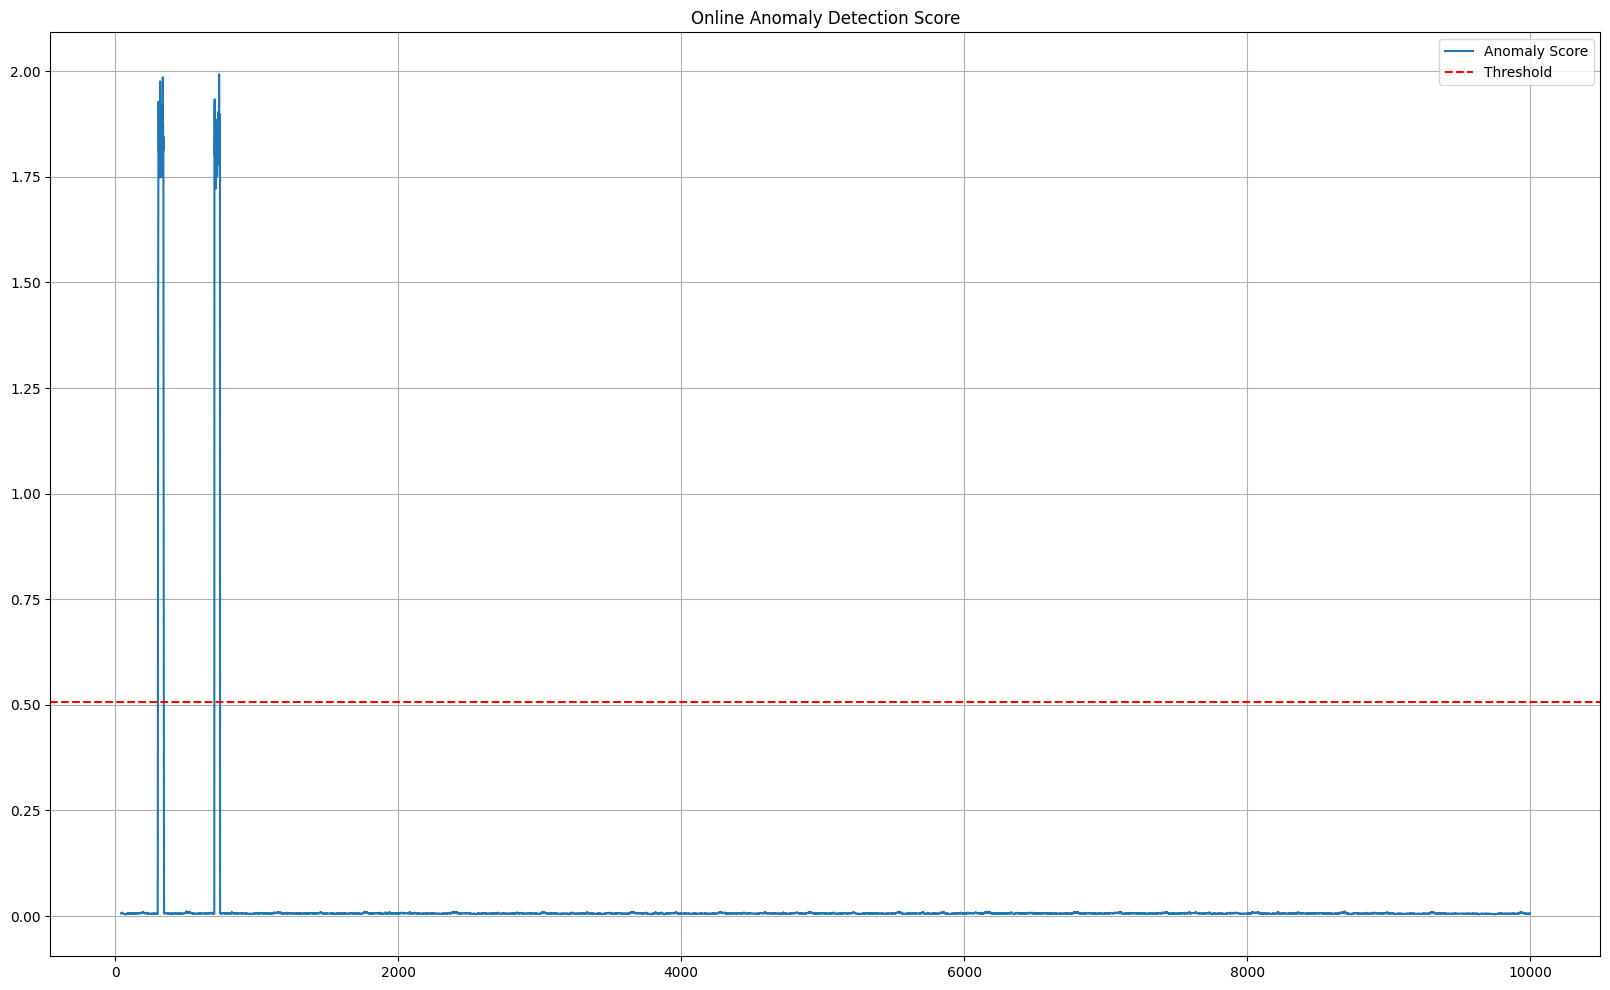

In [6]:
# 5. Plot
plt.figure(figsize=(20,12))
plt.plot(scores, label='Anomaly Score')
plt.axhline(np.nanmean(scores) + 3*np.nanstd(scores), color='r', linestyle='--', label='Threshold')
plt.legend()
plt.grid()
plt.title('Online Anomaly Detection Score')
plt.show()


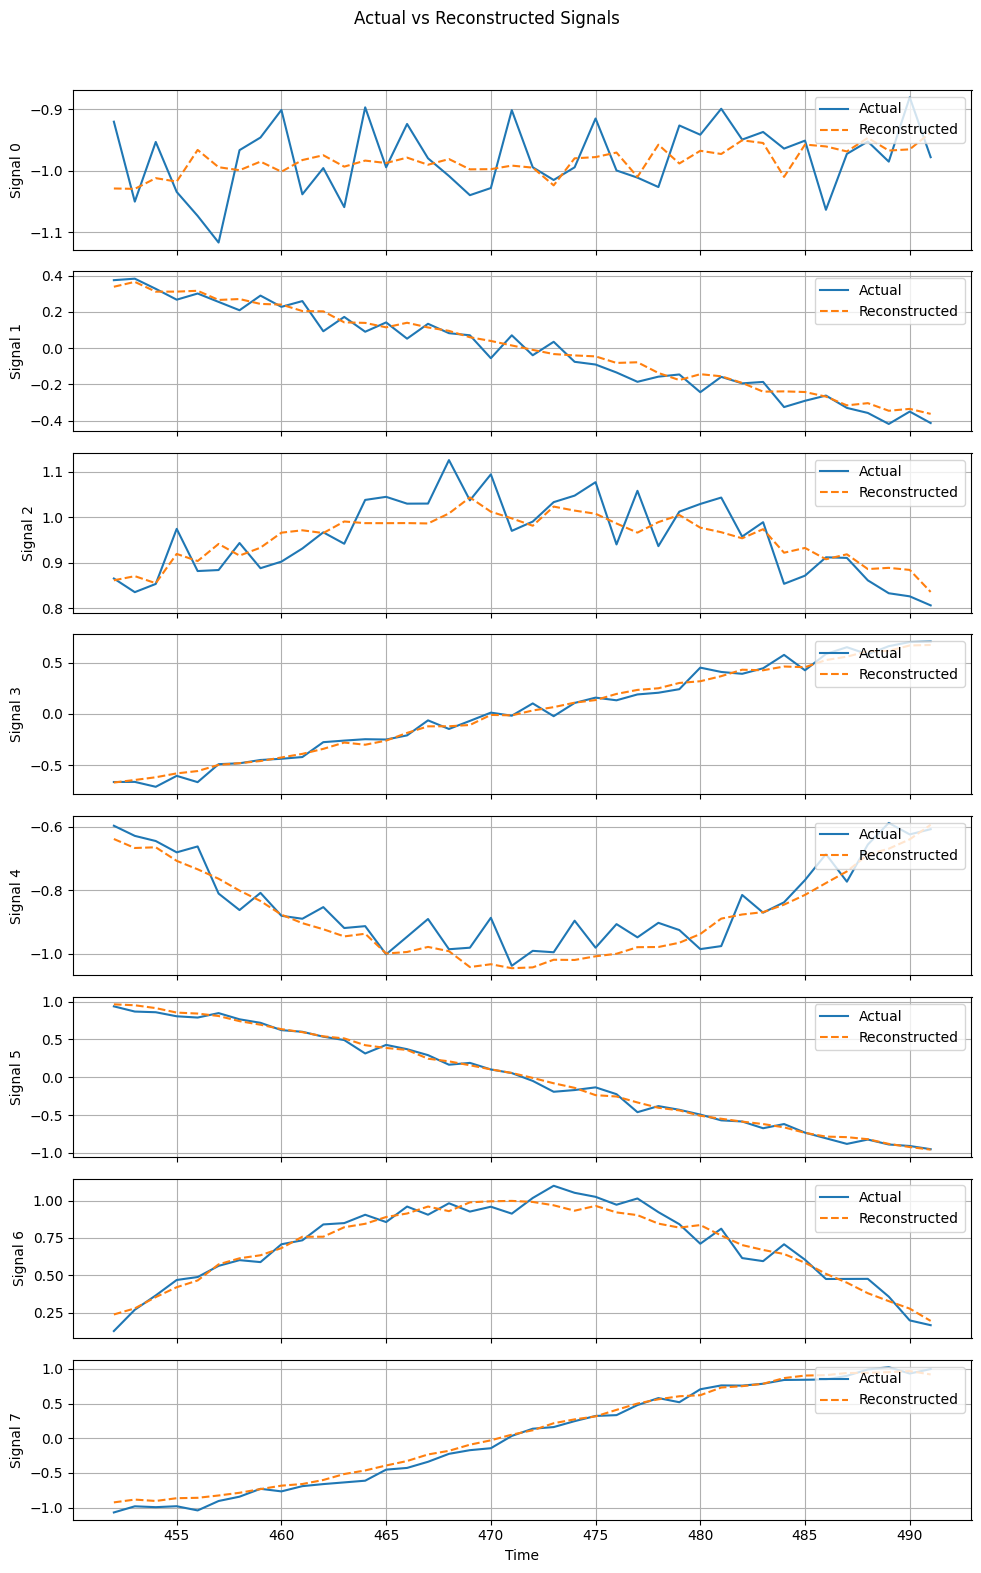

In [7]:
# After calling model on a window:
window_size = 40
window_start = 452
x_window = X[window_start:window_start + window_size]
x_window_scaled = scaler.transform(x_window)
x_input = torch.tensor(x_window_scaled, dtype=torch.float32).unsqueeze(0)

with torch.no_grad():
    x_output = model(x_input).squeeze(0).numpy()

# Inverse scale if needed
x_original = scaler.inverse_transform(x_window_scaled)
x_reconstructed = scaler.inverse_transform(x_output)

plot_reconstruction(x_original, x_reconstructed, window_start=window_start)


In [8]:
import plotly.graph_objs as go

fig = go.Figure()
for i in range(D):
    fig.add_trace(go.Scatter(y=X[:, i], mode='lines', name=f'Signal {i+1}'))

fig.update_layout(
    title='Each Signal in X Timeseries',
    xaxis_title='Time',
    yaxis_title='Value',
    legend_title='Signals',
    height=600,
    width=1000
)
fig.show()